In [ ]:
import numpy as np  #to manipulate array dataframes(comes from tables)
import pandas as pd  #to manipulate dataframes

import seaborn as sns  #for data visualization (provides a variety of visualization patterns as scaterplot and lineplot)
import matplotlib.pyplot as plt #for data visualization (Visualization using Matplotlib generally consists of bars,pies,lines,scatter plots)
import os  #module for interacting with the native OS Python which is currently running on.

from sklearn.utils import shuffle               #to shuffle the data to remove any inherent ordering in the dataset
                                                # which can lead to bias in the learning process
from sklearn.tree import DecisionTreeRegressor  #importation od decision tree module
from sklearn.svm import SVR                     #importation of SVR module
from sklearn.ensemble import RandomForestRegressor  #importattion of randomforest regressor module
from sklearn.linear_model import LinearRegression, Ridge, Lasso  #importation of linear regression module

from sklearn.model_selection import train_test_split #to devide dataframe into testing and training

from sklearn.preprocessing import StandardScaler   #for the normalisation of data
from sklearn.preprocessing import LabelEncoder     #to convert categorical data into numerical

from sklearn.metrics import r2_score   #coefficient of determination (regression score function)
from sklearn.metrics import mean_squared_error  #error calculation module
from sklearn.model_selection import cross_val_score  #model to evaluate the model Model-evaluation tools
from sklearn.metrics import classification_report, confusion_matrix  #to test the performance of the machine learning model
from sklearn.model_selection import GridSearchCV,ShuffleSplit    #to determine the best model with the best parameters (model evaluation tool)

from sklearn import linear_model  #module it contain different functions for performing machine learning with linear models.
                                  #The term linear model implies that the model is specified as a linear combination of features

import xgboost as xgb

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/MyDrive/pfetest'

os.chdir(PATH)

##Data importation

In [ ]:
#importaion of the exel file
df = pd.read_excel('output_data.xlsx')
#convert the dataframe to a CSV file
df.to_csv('output_data.csv', index=False)

In [ ]:
df

,name,price (in $ ),x(mm),y(mm),z(mm),dimension (mm),Finish,technolgy,material,color,Process
0,first.stl,33.92,138.0,34.0,14.5,68034.000,No Finish,FDM,ABS(standard transparent),black,3Dprinting
1,hello.step,160.63,240.0,70.5,28.0,473760.000,No Finish,FDM,ABS,black,3Dprinting
2,7772686460MainAssemblycontrolswitch1.STL,154.38,70.0,60.0,60.0,252000.000,No Finish,FDM,ABS,black,3Dprinting
3,second.stl,43.97,46.5,45.0,40.8,85374.000,No Finish,FDM,ABS,black,3Dprinting
4,19202101113Prusai3MK3SLaserMountforOptLasersGr...,40.29,85.0,42.0,20.0,71400.000,No Finish,FDM,ABS,black,3Dprinting
...,...,...,...,...,...,...,...,...,...,...,...
462,AvionArt.stl,110.46,200.0,124.7,56.5,1409110.000,No Finish,FDM,ABS,black,3Dprinting
463,home.stl,376.99,112.5,101.3,86.9,990334.125,No Finish,FDM,ABS,black,3Dprinting
464,Open Source.stl,377.92,210.0,96.4,93.5,1892814.000,No Finish,FDM,ABS,black,3Dprinting
465,console.stl,336.70,179.3,148.2,115.0,3055809.900,No Finish,FDM,ABS,black,3Dprinting


In [ ]:
df.shape

(467, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            467 non-null    object 
 1   price (in $ )   467 non-null    float64
 2   x(mm)           467 non-null    float64
 3   y(mm)           467 non-null    float64
 4   z(mm)           467 non-null    float64
 5   dimension (mm)  467 non-null    float64
 6   Finish          467 non-null    object 
 7   technolgy       467 non-null    object 
 8   material        467 non-null    object 
 9   color           467 non-null    object 
 10  Process         467 non-null    object 
dtypes: float64(5), object(6)
memory usage: 40.3+ KB


##reading the data
##1- finding empty sets
##2- اreconnaisane pf data
##3- detect the features that creatures the prices

In [ ]:
##convert all columns to its type
df['name']=df['name'].astype(str)
df['Finish']=df['Finish'].astype(str)
df['technolgy']=df['technolgy'].astype(str)
df['material']=df['material'].astype(str)
df['color']=df['color'].astype(str)
df['Process']=df['Process'].astype(str)

In [ ]:
type(df['x(mm)'][0])

numpy.float64

In [ ]:
type(df['y(mm)'][0])

numpy.float64

In [ ]:
def convert_tofloat(col): #function convert value of object type to float
  df[col]=df[col].astype(float)

In [ ]:
convert_tofloat('x(mm)')
convert_tofloat('y(mm)')
convert_tofloat('z(mm)')

In [ ]:
type(df['x(mm)'][0])

numpy.float64

In [ ]:
type(df['y(mm)'][0])

numpy.float64

In [ ]:
type(df['z(mm)'][0])

numpy.float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            467 non-null    object 
 1   price (in $ )   467 non-null    float64
 2   x(mm)           467 non-null    float64
 3   y(mm)           467 non-null    float64
 4   z(mm)           467 non-null    float64
 5   dimension (mm)  467 non-null    float64
 6   Finish          467 non-null    object 
 7   technolgy       467 non-null    object 
 8   material        467 non-null    object 
 9   color           467 non-null    object 
 10  Process         467 non-null    object 
dtypes: float64(5), object(6)
memory usage: 40.3+ KB


In [ ]:
#See number of missing value in each column
df.isna().sum()

name              0
price (in $ )     0
x(mm)             0
y(mm)             0
z(mm)             0
dimension (mm)    0
Finish            0
technolgy         0
material          0
color             0
Process           0
dtype: int64

##function fillna pour fill the null and missing values

In [ ]:
def fillna(df,col):
  df[col].fillna(df[col].astype("float64").mean(), inplace = True)

In [ ]:
fillna(df,'x(mm)')
fillna(df,'y(mm)')
fillna(df,'z(mm)')

In [ ]:
df.isna().sum()

name              0
price (in $ )     0
x(mm)             0
y(mm)             0
z(mm)             0
dimension (mm)    0
Finish            0
technolgy         0
material          0
color             0
Process           0
dtype: int64

In [ ]:
df.describe()  ##show statics of columns

,price (in $ ),x(mm),y(mm),z(mm),dimension (mm)
count,467.000000,467.000000,467.000000,467.000000,4.670000e+02
mean,93.118458,96.042529,62.541147,33.884850,5.556200e+05
std,160.508857,70.108367,51.271526,36.800105,1.661300e+06
min,2.740000,0.700000,0.600000,0.400000,2.100000e-01
25%,18.090000,40.050000,24.800000,8.000000,1.324000e+04
50%,38.230000,82.000000,48.000000,22.200000,8.537400e+04
75%,96.155000,138.000000,86.550000,44.650000,3.949541e+05
max,1492.190000,442.900000,345.600000,253.000000,2.362710e+07


In [ ]:
df['x(mm)']=df['x(mm)'].astype(float)

In [ ]:
df['y(mm)']=df['y(mm)'].astype(float)

In [ ]:
df['z(mm)']=df['z(mm)'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            467 non-null    object 
 1   price (in $ )   467 non-null    float64
 2   x(mm)           467 non-null    float64
 3   y(mm)           467 non-null    float64
 4   z(mm)           467 non-null    float64
 5   dimension (mm)  467 non-null    float64
 6   Finish          467 non-null    object 
 7   technolgy       467 non-null    object 
 8   material        467 non-null    object 
 9   color           467 non-null    object 
 10  Process         467 non-null    object 
dtypes: float64(5), object(6)
memory usage: 40.3+ KB


In [ ]:
# calculate the surface values based on other columns
surface = df['x(mm)'] * df['y(mm)']* df['z(mm)']
# replace the original dimension column with the calculated value
df['dimension (mm)'] = surface

In [ ]:
df.isna().sum()

name              0
price (in $ )     0
x(mm)             0
y(mm)             0
z(mm)             0
dimension (mm)    0
Finish            0
technolgy         0
material          0
color             0
Process           0
dtype: int64

#fill the missing values by imputation with mean (average)

In [ ]:
surface.fillna(surface.astype("float64").mean(), inplace = True)

In [ ]:
# replace the original dimension column with the calculated value
df['dimension (mm)'] = surface
df

,name,price (in $ ),x(mm),y(mm),z(mm),dimension (mm),Finish,technolgy,material,color,Process
0,first.stl,33.92,138.0,34.0,14.5,68034.000,No Finish,FDM,ABS(standard transparent),black,3Dprinting
1,hello.step,160.63,240.0,70.5,28.0,473760.000,No Finish,FDM,ABS,black,3Dprinting
2,7772686460MainAssemblycontrolswitch1.STL,154.38,70.0,60.0,60.0,252000.000,No Finish,FDM,ABS,black,3Dprinting
3,second.stl,43.97,46.5,45.0,40.8,85374.000,No Finish,FDM,ABS,black,3Dprinting
4,19202101113Prusai3MK3SLaserMountforOptLasersGr...,40.29,85.0,42.0,20.0,71400.000,No Finish,FDM,ABS,black,3Dprinting
...,...,...,...,...,...,...,...,...,...,...,...
462,AvionArt.stl,110.46,200.0,124.7,56.5,1409110.000,No Finish,FDM,ABS,black,3Dprinting
463,home.stl,376.99,112.5,101.3,86.9,990334.125,No Finish,FDM,ABS,black,3Dprinting
464,Open Source.stl,377.92,210.0,96.4,93.5,1892814.000,No Finish,FDM,ABS,black,3Dprinting
465,console.stl,336.70,179.3,148.2,115.0,3055809.900,No Finish,FDM,ABS,black,3Dprinting


In [ ]:
df.isna().sum()

name              0
price (in $ )     0
x(mm)             0
y(mm)             0
z(mm)             0
dimension (mm)    0
Finish            0
technolgy         0
material          0
color             0
Process           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            467 non-null    object 
 1   price (in $ )   467 non-null    float64
 2   x(mm)           467 non-null    float64
 3   y(mm)           467 non-null    float64
 4   z(mm)           467 non-null    float64
 5   dimension (mm)  467 non-null    float64
 6   Finish          467 non-null    object 
 7   technolgy       467 non-null    object 
 8   material        467 non-null    object 
 9   color           467 non-null    object 
 10  Process         467 non-null    object 
dtypes: float64(5), object(6)
memory usage: 40.3+ KB


In [ ]:
##convert dimension for removing the comma and any extra text

df['dimension (mm)'] =df['dimension (mm)'].astype(str).str.replace(',', '.')
df['x(mm)'] =df['x(mm)'].astype(str).str.replace(',', '.')
df['y(mm)'] =df['y(mm)'].astype(str).str.replace(',', '.')
df['z(mm)'] =df['z(mm)'].astype(str).str.replace(',', '.')
df

,name,price (in $ ),x(mm),y(mm),z(mm),dimension (mm),Finish,technolgy,material,color,Process
0,first.stl,33.92,138.0,34.0,14.5,68034.0,No Finish,FDM,ABS(standard transparent),black,3Dprinting
1,hello.step,160.63,240.0,70.5,28.0,473760.0,No Finish,FDM,ABS,black,3Dprinting
2,7772686460MainAssemblycontrolswitch1.STL,154.38,70.0,60.0,60.0,252000.0,No Finish,FDM,ABS,black,3Dprinting
3,second.stl,43.97,46.5,45.0,40.8,85374.0,No Finish,FDM,ABS,black,3Dprinting
4,19202101113Prusai3MK3SLaserMountforOptLasersGr...,40.29,85.0,42.0,20.0,71400.0,No Finish,FDM,ABS,black,3Dprinting
...,...,...,...,...,...,...,...,...,...,...,...
462,AvionArt.stl,110.46,200.0,124.7,56.5,1409110.0,No Finish,FDM,ABS,black,3Dprinting
463,home.stl,376.99,112.5,101.3,86.9,990334.1250000001,No Finish,FDM,ABS,black,3Dprinting
464,Open Source.stl,377.92,210.0,96.4,93.5,1892814.0,No Finish,FDM,ABS,black,3Dprinting
465,console.stl,336.70,179.3,148.2,115.0,3055809.9,No Finish,FDM,ABS,black,3Dprinting


In [ ]:
# write the updated dataframe to a new CSV file
df.to_excel('output_data.xlsx', index=False)

In [ ]:
# download the excel file
from google.colab import files

files.download('output_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###upload the file without ,

In [ ]:
PATH = '/content/drive/MyDrive/pfetest/'

os.chdir(PATH)

In [ ]:
df=pd.read_excel(PATH + 'output_data.xlsx')

In [ ]:
df

,name,price (in $ ),x(mm),y(mm),z(mm),dimension (mm),Finish,technolgy,material,color,Process
0,first.stl,33.92,138.0,34.0,14.5,68034.000,No Finish,FDM,ABS(standard transparent),black,3Dprinting
1,hello.step,160.63,240.0,70.5,28.0,473760.000,No Finish,FDM,ABS,black,3Dprinting
2,7772686460MainAssemblycontrolswitch1.STL,154.38,70.0,60.0,60.0,252000.000,No Finish,FDM,ABS,black,3Dprinting
3,second.stl,43.97,46.5,45.0,40.8,85374.000,No Finish,FDM,ABS,black,3Dprinting
4,19202101113Prusai3MK3SLaserMountforOptLasersGr...,40.29,85.0,42.0,20.0,71400.000,No Finish,FDM,ABS,black,3Dprinting
...,...,...,...,...,...,...,...,...,...,...,...
462,AvionArt.stl,110.46,200.0,124.7,56.5,1409110.000,No Finish,FDM,ABS,black,3Dprinting
463,home.stl,376.99,112.5,101.3,86.9,990334.125,No Finish,FDM,ABS,black,3Dprinting
464,Open Source.stl,377.92,210.0,96.4,93.5,1892814.000,No Finish,FDM,ABS,black,3Dprinting
465,console.stl,336.70,179.3,148.2,115.0,3055809.900,No Finish,FDM,ABS,black,3Dprinting


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            467 non-null    object 
 1   price (in $ )   467 non-null    float64
 2   x(mm)           467 non-null    float64
 3   y(mm)           467 non-null    float64
 4   z(mm)           467 non-null    float64
 5   dimension (mm)  467 non-null    float64
 6   Finish          467 non-null    object 
 7   technolgy       467 non-null    object 
 8   material        467 non-null    object 
 9   color           467 non-null    object 
 10  Process         467 non-null    object 
dtypes: float64(5), object(6)
memory usage: 40.3+ KB


In [ ]:
df.describe(include=object)  ##show statics of columns with object type

,name,Finish,technolgy,material,color,Process
count,467,467,467,467,467,467
unique,446,1,1,2,1,1
top,Shiny Snicket-Blad b...,No Finish,FDM,ABS,black,3Dprinting
freq,5,467,467,466,467,467


In [ ]:
df.describe(include=float) #show statics of columns with float type

,price (in $ ),x(mm),y(mm),z(mm),dimension (mm)
count,467.000000,467.000000,467.000000,467.000000,4.670000e+02
mean,93.118458,96.042529,62.541147,33.884850,5.556200e+05
std,160.508857,70.108367,51.271526,36.800105,1.661300e+06
min,2.740000,0.700000,0.600000,0.400000,2.100000e-01
25%,18.090000,40.050000,24.800000,8.000000,1.324000e+04
50%,38.230000,82.000000,48.000000,22.200000,8.537400e+04
75%,96.155000,138.000000,86.550000,44.650000,3.949541e+05
max,1492.190000,442.900000,345.600000,253.000000,2.362710e+07


In [ ]:
df['price (in $ )']=df['price (in $ )'].astype(str).str.replace(',', '')

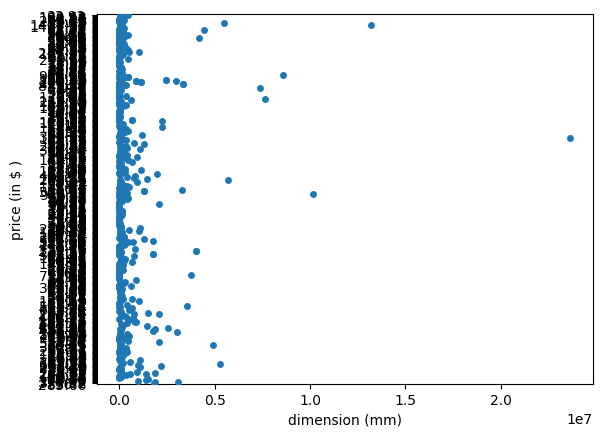

In [ ]:
sns.stripplot(x="dimension (mm)", y="price (in $ )" ,data=df);

<Axes: xlabel='dimension (mm)', ylabel='price (in $ )'>

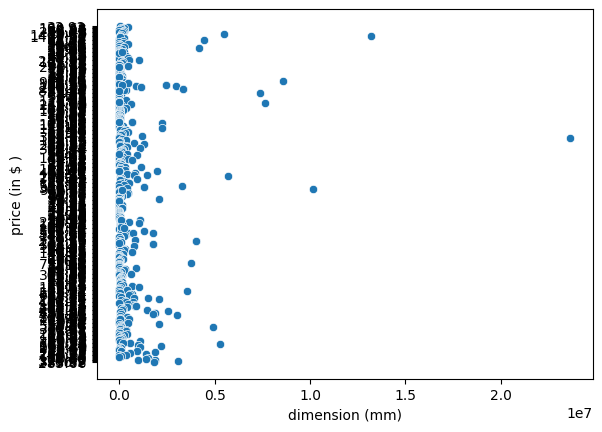

In [ ]:
sns.scatterplot(data=df, x=df['dimension (mm)'], y=df['price (in $ )'])

In [ ]:
type(df['dimension (mm)'][0])

numpy.float64

In [ ]:
df['dimension (mm)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 468 entries, 0 to 467
Series name: dimension (mm)
Non-Null Count  Dtype  
--------------  -----  
468 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


In [ ]:
print(df[['x(mm)', 'y(mm)', 'z(mm)', 'dimension (mm)']].isnull().sum())

x(mm)             0
y(mm)             0
z(mm)             0
dimension (mm)    0
dtype: int64


In [ ]:
print(df[['x(mm)', 'y(mm)', 'z(mm)', 'dimension (mm)','price (in $ )']].isnull().sum())

x(mm)             0
y(mm)             0
z(mm)             0
dimension (mm)    0
price (in $ )     0
dtype: int64


In [ ]:
### count the frequency of each value in the 'price' column
freq = df['dimension (mm)'].value_counts()
freq

109440.000     4
34387.070      4
1232.450       3
4296.240       3
14697.440      3
              ..
371117.824     1
34999.056      1
1292197.500    1
758912.000     1
1798260.000    1
Name: dimension (mm), Length: 414, dtype: int64

##create frequency of the price column

In [ ]:
# count the frequency of each value in the 'price' column
freqx = df["x(mm)"].value_counts(ascending=False)

print(freqx)

95.0     7
150.0    7
100.0    6
48.7     5
200.0    5
        ..
79.6     1
3.1      1
122.6    1
97.9     1
205.0    1
Name: x(mm), Length: 324, dtype: int64


In [ ]:
# count the frequency of each value in the 'price' column
freq =df['z(mm)'].value_counts(ascending=False)

print(freq)

5.0      17
7.0      13
4.0       8
23.0      7
40.8      6
         ..
20.4      1
28.5      1
30.7      1
108.0     1
43.0      1
Name: z(mm), Length: 256, dtype: int64


In [ ]:
freq= df['price (in $ )'].value_counts(ascending=False)
print(freq)

31.35     4
58.31     3
15.68     3
160.44    3
138.58    3
         ..
28.95     1
270.67    1
38.23     1
19.94     1
285.66    1
Name: price (in $ ), Length: 419, dtype: int64


In [ ]:
freq =df['name'].value_counts(ascending=False)
print(freq)

Shiny Snicket-Blad b...               5
ItsLitho_pogchamp-twitch-own3d.stl    2
catalyst whole.stl                    2
Curious Box Bottom.s...               2
Assassin Short Bow bottom.stl         2
                                     ..
Merrow updated.stl                    1
Bulette Updated.stl                   1
Turntable2.stl                        1
Ollie.stl                             1
Pride Pencil Cups.st                  1
Name: name, Length: 446, dtype: int64


In [ ]:
def bar_plot(col):
  plt.hist(col)
  plt.title('Histogram of frequency of A column ')
  plt.xlabel('Value of column')
  plt.ylabel('fruency')
  # Adjust the size as per your requirement
  plt.figure(figsize=(100,20))
  # display the plot
  plt.show()

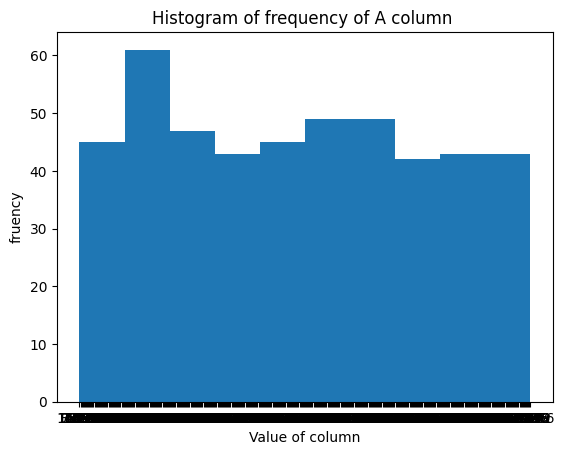

<Figure size 10000x2000 with 0 Axes>

In [ ]:
bar_plot(df['price (in $ )'])

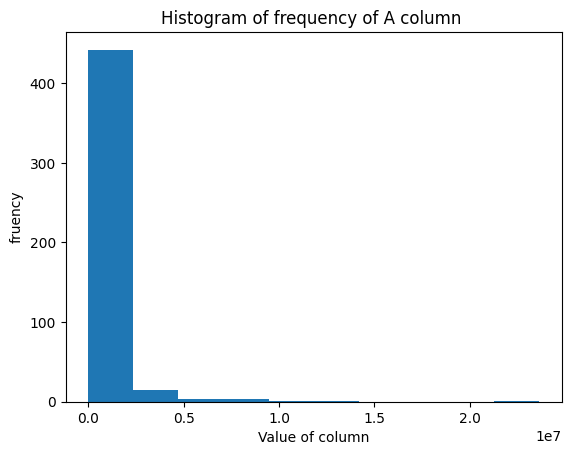

<Figure size 10000x2000 with 0 Axes>

In [ ]:
bar_plot(df['dimension (mm)'])

##visualisation de nombre (count) de valeurs uniques de colonne price ordonné pour distingué le type de diemenion le plous utilisé

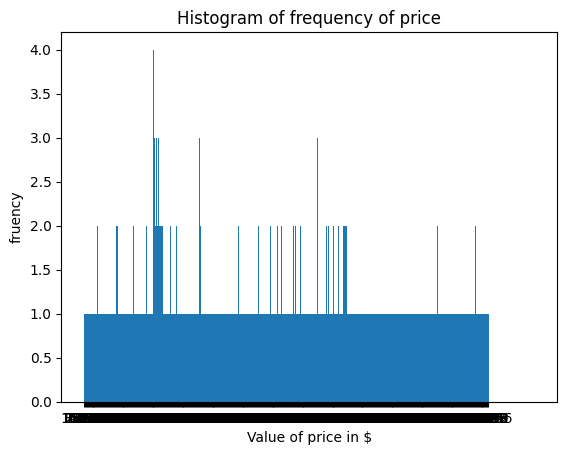

<Figure size 10000x500 with 0 Axes>

In [ ]:
plt.hist(df['price (in $ )'],range( len(df['price (in $ )'])) )
# add a title and labels to the plot
plt.title('Histogram of frequency of price')
plt.xlabel('Value of price in $')
plt.ylabel('fruency')
# Adjust the size as per your requirement
plt.figure(figsize=(100,5))
# display the plot
plt.show()

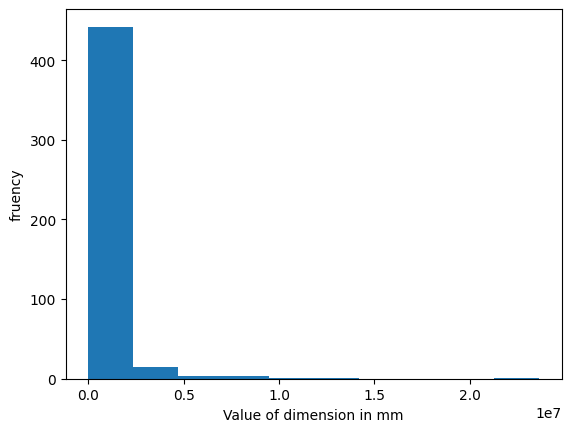

<Figure size 10000x700 with 0 Axes>

In [ ]:
plt.hist(df['dimension (mm)'])
plt.xlabel('Value of dimension in mm')  # add a title and labels to the plot
plt.ylabel('fruency')
plt.figure(figsize=(100,7))  # Adjust the size as per your requirement
plt.show()  # display the plot

####histogramme of the price dependin go the material

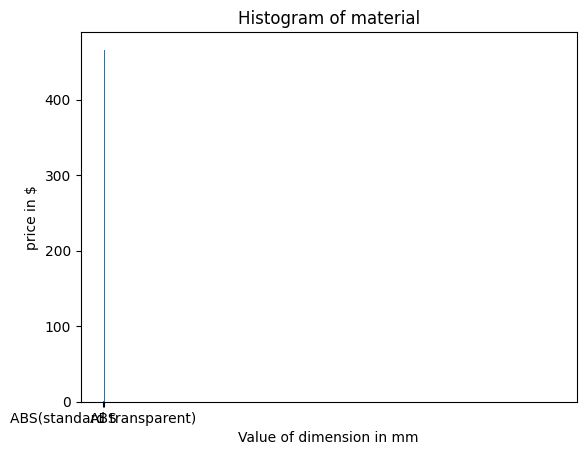

In [ ]:
plt.hist( df['material'],range(len(df['material']))  )
plt.title('Histogram of material')  # add a title and labels to the plot
plt.xlabel('Value of dimension in mm')
plt.ylabel('price in $')  # display the plot
plt.show()

In [ ]:
plt.hist( df['technolgy'] , range(len(d['technolgy'])) )
plt.title('Histogram of	technolgy	')  # add a title and labels to the plot
plt.xlabel('Value of frequency' )
plt.ylabel(' 	technolgy	')  # display the plot
plt.show()

NameError: ignored

In [ ]:
# Extracting the model input and output features
X = df.drop(["name","Finish","technolgy","material","color","Process"], axis=1)  # Removing species columns from the input features
y = df['price (in $ )']  # Single output

In [ ]:
X


,price (in $ ),x(mm),y(mm),z(mm),dimension (mm)
0,33.92,138.0,34.0,14.5,68034.000
1,160.63,240.0,70.5,28.0,473760.000
2,154.38,70.0,60.0,60.0,252000.000
3,43.97,46.5,45.0,40.8,85374.000
4,40.29,85.0,42.0,20.0,71400.000
...,...,...,...,...,...
462,110.46,200.0,124.7,56.5,1409110.000
463,376.99,112.5,101.3,86.9,990334.125
464,377.92,210.0,96.4,93.5,1892814.000
465,336.7,179.3,148.2,115.0,3055809.900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            467 non-null    object 
 1   price (in $ )   467 non-null    object 
 2   x(mm)           467 non-null    float64
 3   y(mm)           467 non-null    float64
 4   z(mm)           467 non-null    float64
 5   dimension (mm)  467 non-null    float64
 6   Finish          467 non-null    object 
 7   technolgy       467 non-null    object 
 8   material        467 non-null    object 
 9   color           467 non-null    object 
 10  Process         467 non-null    object 
dtypes: float64(4), object(7)
memory usage: 40.3+ KB


In [ ]:
print (y)

0       33.92
1      160.63
2      154.38
3       43.97
4       40.29
        ...  
462    110.46
463    376.99
464    377.92
465     336.7
466    285.66
Name: price (in $ ), Length: 467, dtype: object


###Shuffling the data is an important step in many machine learning tasks. The main reason for shuffling the data is to remove any inherent ordering in the dataset, which can lead to bias in the learning process.

For example, imagine a dataset where the samples are ordered by the value of the target variable. If we do not shuffle the data before splitting it into training and testing sets, we may end up with a training set that contains only low or high values of the target variable, while the testing set contains the opposite. This can lead to poor performance on the testing set, as the model has not been trained on a representative sample of the data.

Shuffling the data can help to prevent this type of bias by ensuring that the samples are randomly distributed across the training and testing sets. In addition, shuffling the data can help to prevent overfitting by ensuring that the model does not memorize the order of the samples during training.



##If you split the data into training and testing sets without shuffling, you may end up with all the most recent customers in the testing set and all the older customers in the training set. This can lead to poor performance on the testing set, as the model has not been trained on a representative sample of the data.

To avoid this issue, you should shuffle the data before splitting it into training and testing sets. This will ensure that the most recent customers are randomly distributed across the training and testing sets, and that the model is trained on a representative sample of the data. You can use the shuffle method in NumPy or Scikit-learn to shuffle the data before splitting it.

In [ ]:
from sklearn.utils import shuffle
# Shuffle the data
X, y = shuffle(X, y, random_state=42)

In [ ]:
print(y)

55      15.98
63      38.83
33      11.18
462    110.46
72     138.58
        ...  
106      8.13
270      3.25
348    113.57
435     29.66
102    135.35
Name: price (in $ ), Length: 467, dtype: object


In [ ]:
#split the data into training and testing sets  train_size = int(0.8 * len(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42 )

In [ ]:
X_train

,price (in $ ),x(mm),y(mm),z(mm),dimension (mm)
65,31.33,108.0,108.0,7.0,81648.000
11,45.61,46.5,45.0,40.8,85374.000
306,4.43,5.3,3.9,0.8,16.536
296,8.03,40.0,40.0,2.0,3200.000
199,27.44,100.0,14.7,12.9,18963.000
...,...,...,...,...,...
24,71.26,148.0,148.0,20.0,438080.000
333,8.06,14.0,14.1,5.2,1026.480
27,66.70,145.0,46.5,40.8,275094.000
344,20.51,128.1,120.0,2.0,30744.000


In [ ]:
X_test

,price (in $ ),x(mm),y(mm),z(mm),dimension (mm)
131,51.80,191.0,34.0,34.00,220796.000
175,127.1,122.6,59.0,91.45,661494.430
90,52.07,79.0,35.5,35.30,98998.850
107,23.61,80.2,48.7,7.70,30074.198
426,31.47,35.0,30.4,25.90,27557.600
...,...,...,...,...,...
166,8.21,44.2,33.0,29.50,43028.700
226,9.91,37.7,10.5,5.00,1979.250
346,188.53,193.2,193.2,18.40,686802.816
265,39.02,108.0,30.0,18.20,58968.000


In [ ]:
# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (374, 5) (374,)
Testing set shape: (94, 5) (94,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:
df['price (in $ )'].astype(float)

0       33.92
1      160.63
2      154.38
3       43.97
4       40.29
        ...  
463    110.46
464    376.99
465    377.92
466    336.70
467    285.66
Name: price (in $ ), Length: 468, dtype: float64

In [ ]:
#Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fit the linear regression model to the training data
reg = LinearRegression()
reg.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = reg.predict(X_test)

In [ ]:
# Calculate the mean squared error and root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print("Linear Regression:")
print("MSE:", mse)
print("RMSE:", rmse)


r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")
print("Learned coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)
predicted_price = reg.predict([[92.5,43.97,46.5,45.0,40.8]])
print("Predicted price:", predicted_price)

Linear Regression:
MSE: 6.052171076549845e-26
RMSE: 2.460116069731232e-13
R^2 score: 1.0
Learned coefficients:  [ 1.00000000e+00  1.29301294e-16 -5.53333262e-17  5.38437490e-17
  2.03076183e-20]
Intercept:  -1.1368683772161603e-13
Predicted price: [92.5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
